# Linear Regression

This notebook mentions the programming exercise of week 2.

In general, the workflow of two assignments (linear regression with one variable and linear regression with multiple variables) is presented in the figure below.

![workflow](images/linear_regression_workflow.svg)

It consists of four steps:
- Load Data: load data from text files, ex1data1.txt and ex1data2.txt.
- Define functions: define functions to predict outputs, to compute cost, to normalize features, and to carry out the algorithm gradient descent.
- Prepare Data: add column of ones to variables, do normalize features if needed.
- Training: initialize weights, learning rate, and number of iterations (called epochs) then lauch gradient descent.

I do some more steps of visualization to figure out the dataset and result obtained.

The data and Matlab code (*if you need to refer*) are in the directory [w2](w2/).

## 1. Linear Regression with one variable

In this assignment, you need to predict profits for a food truck.

Suppose you are the CEO of a restaurant franchise and considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

The data set is stored in the file `ex1data1.txt`. A negative value for profit indicates a loss.

### 1.1. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1.2. Load data

In [2]:
DATA_FILE="w2/ex1data1.txt"

In [3]:
data = np.loadtxt(DATA_FILE, delimiter=",")
data[:5,:]

array([[ 6.1101, 17.592 ],
       [ 5.5277,  9.1302],
       [ 8.5186, 13.662 ],
       [ 7.0032, 11.854 ],
       [ 5.8598,  6.8233]])

In [4]:
X = data[:,0]  # population
Y = data[:,1]  # profit

### 1.3. Explorer data

In [5]:
print("number of sample = %s" % X.shape[0])

number of sample = 97


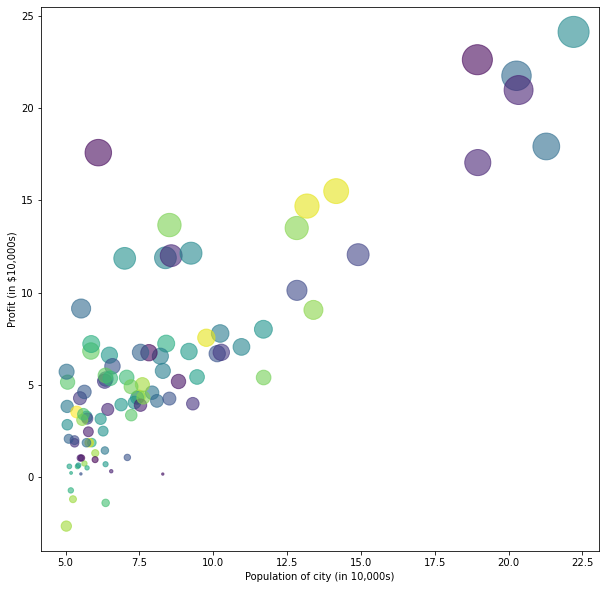

In [6]:
area = np.absolute(Y)*40
colors = np.random.rand(X.shape[0])

fig = plt.figure(figsize=(10,10))
plt.scatter(X, Y, c=colors, alpha=0.6, s=area)
plt.xlabel("Population of city (in 10,000s)")
plt.ylabel("Profit (in $10,000s)")
plt.show();

fig.savefig('images/linear_regression_restaurant.svg', bbox_inches='tight')

### 1.4. Define functions

In [7]:
def predict(X, w):
    Yh = np.matmul(X, w)
    return Yh

def cost_fn(X, w, Y):
    Yh = predict(X, w)
    D = Yh - Y
    cost = np.mean(D**2)
    return cost

In [8]:
def gradient_descent(X, Y, w, lr, epochs):
    logs = list()
    m = X.shape[0]
    for i in range(epochs):
        # update weights
        Yh = predict(X, w)
        w = w - (lr/m)*np.matmul(X.T,(Yh-Y))
        # compute cost
        cost = cost_fn(X, w, Y)
        logs.append(cost)
    return w, logs

### 1.5. Prepare data

In [9]:
X = np.column_stack((np.ones(X.shape[0]), X))  # add column of ones to X
X[:5,]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

### 1.6. Training

In [10]:
w = np.zeros(X.shape[1])  # weights initialization
lr = 1e-2  # learning rate
epochs = 1500  # number of iteration
w, logs = gradient_descent(X, Y, w, lr, epochs)
w

array([-3.63029144,  1.16636235])

### 1.7. Visualize result

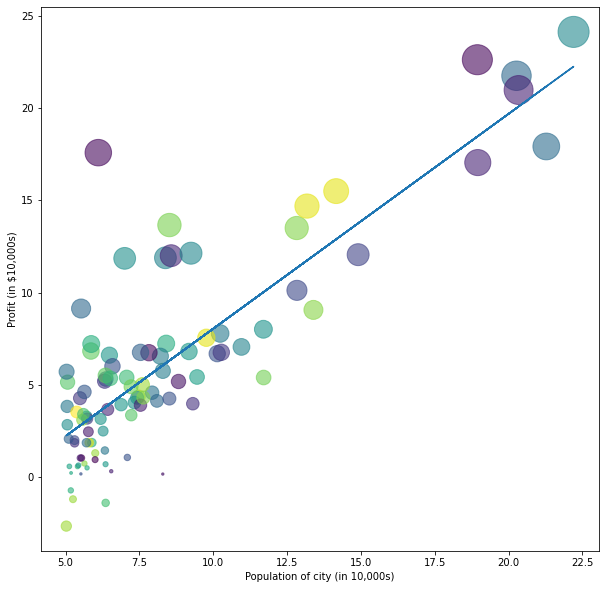

In [11]:
Yh = predict(X, w)

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,1], Y, c=colors, alpha=0.6, s=area)  # training data
plt.plot(X[:,1], Yh)  # prediction line

plt.xlabel("Population of city (in 10,000s)")
plt.ylabel("Profit (in $10,000s)")
plt.show();
fig.savefig('images/linear_regression_restaurant_result.svg', bbox_inches='tight')

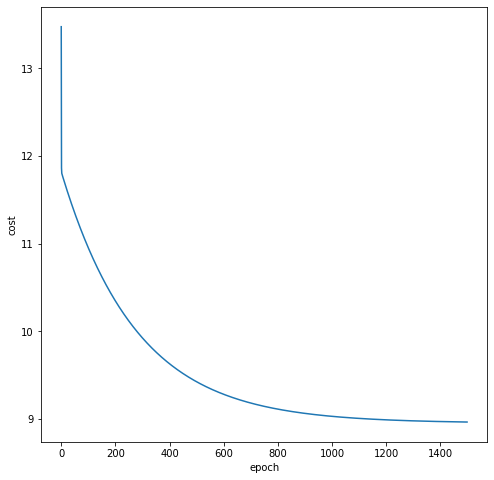

In [12]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(len(logs)), logs)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show();
fig.savefig('images/linear_regression_restaurant_cost.svg', bbox_inches='tight')

## 2. Linear Regression with multiple variables

In this assignment, you need to predict the prices of houses.

Suppose you are selling your house and you want to know what a good market price would be. The file `ex1data2.txt` contains a data set of housing prices in Portland, Oregon. The first columns is the size of the house (in square fit), the second column is the number of bedrooms, and the third column is the price of the house.

### 2.1. Load data

In [13]:
DATA_FILE = "w2/ex1data2.txt"

In [14]:
data = np.loadtxt(DATA_FILE, delimiter=",")
data[:5,:]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [15]:
X = data[:,:2]  # size & nb of bedrooms
Y = data[:,2]  # price

### 2.2. Explorer data

In [16]:
print("number of sample: %s" % X.shape[0])

number of sample: 47


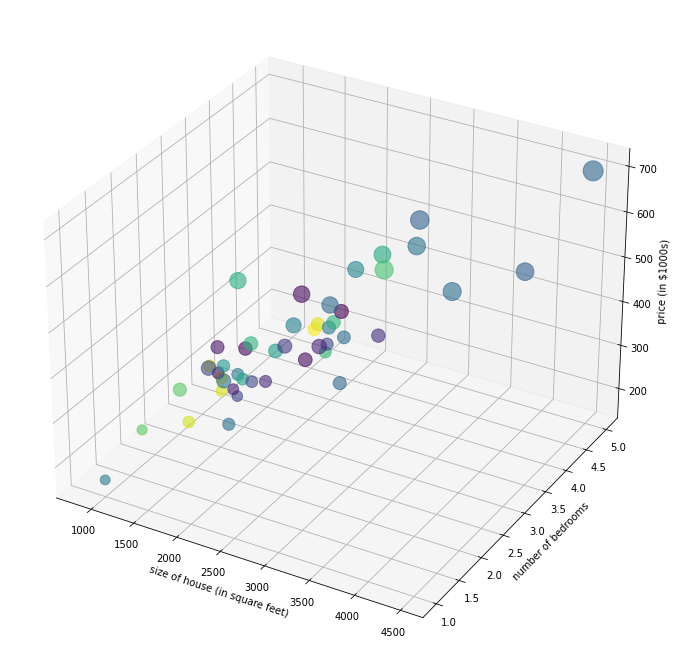

In [17]:
colors = np.random.rand(X.shape[0])
area = Y/Y.max()*400
scale = 1000
Ys = Y/scale

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], Ys, c=colors, alpha=0.6, s=area)
ax.set_xlabel("size of house (in square feet)")
ax.set_ylabel("number of bedrooms")
ax.set_zlabel("price (in $1000s)")
plt.show()
fig.savefig('images/linear_regression_house.svg', bbox_inches='tight')

### 2.3. Define functions

In [18]:
def normalize_features(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mu)/std
    return X_norm

### 2.4. Prepare data

In [19]:
X_norm = normalize_features(X)
X_norm = np.column_stack((np.ones(X_norm.shape[0]), X_norm))
X_norm[:5,:]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

### 2.5. Training

In [20]:
w = np.zeros(X_norm.shape[1])  # weights initialization
lr = 1e-2  # learning rate
epochs = 400  # number of iterations
w, logs = gradient_descent(X_norm, Y, w, lr, epochs)
w

array([334302.06399328,  99411.44947359,   3267.01285407])

### 2.6. Visualize result

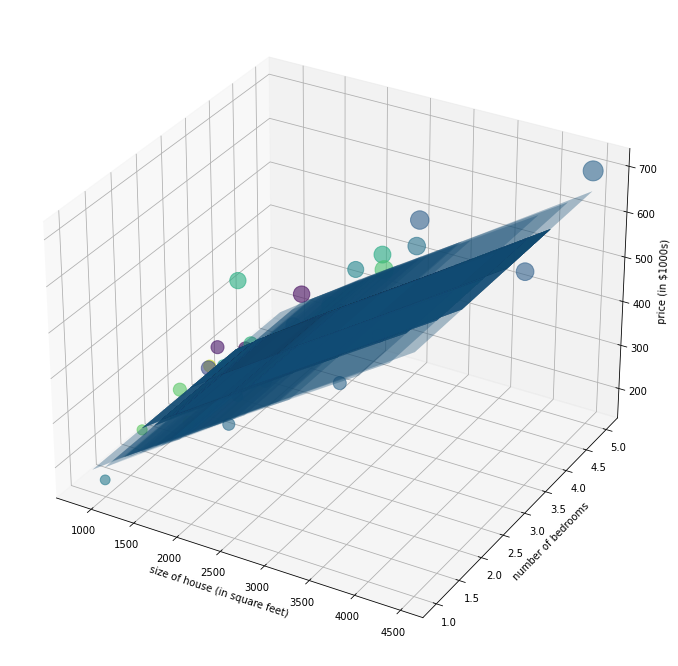

In [21]:
scale = 1000
Ys = Y/scale
Yh = predict(X_norm, w)
Zm,_ = np.meshgrid(Yh, Yh)
Xm, Ym = np.meshgrid(X[:,0], X[:,1])
Zm = Zm/scale

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection='3d')
ax.scatter(X[:,0], X[:,1], Ys, c=colors, alpha=0.6, s=area)  # training data
ax.plot_surface(Xm, Ym, Zm, alpha=0.1)  # surface prediction
ax.set_xlabel("size of house (in square feet)")
ax.set_ylabel("number of bedrooms")
ax.set_zlabel("price (in $1000s)")
plt.show()
fig.savefig('images/linear_regression_house_result.svg', bbox_inches='tight')

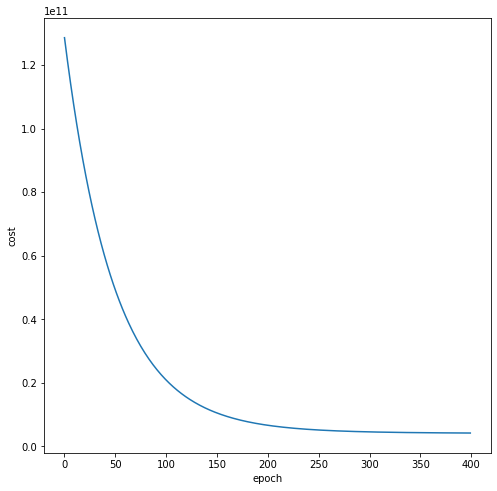

In [22]:
fig = plt.figure(figsize=(8,8))
plt.plot(range(len(logs)), logs)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show();
fig.savefig('images/linear_regression_house_cost.svg', bbox_inches='tight')